In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import dill
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from scipy.stats.stats import pearsonr
import math

In [9]:
# setting flags
debug=False

In [4]:
raw_train_data = pd.read_csv('advertising_train.csv',
                       dtype={'companyId':str,'countryId':str,'deviceType':str,'day':str,'dow':str,'price1':np.float64,
                              'price2':np.float64,'price3':np.float64,'ad_area':np.float64,'ad_ratio':np.float64,'requests':np.float64,'impression':np.float64,
                              'cpc':np.float64,'ctr':np.float64,'viewability':np.float64,'ratio1':np.float64,'ratio2':np.float64,'ratio3':np.float64,
                              'ratio4':np.float64,'ratio5':np.float64,'y':np.float64})
                             
raw_test_data = pd.read_csv('advertising_test.csv',
                       dtype={'companyId':str,'countryId':str,'deviceType':str,'day':str,'dow':str,'price1':np.float64,
                              'price2':np.float64,'price3':np.float64,'ad_area':np.float64,'ad_ratio':np.float64,'requests':np.float64,'impression':np.float64,
                              'cpc':np.float64,'ctr':np.float64,'viewability':np.float64,'ratio1':np.float64,'ratio2':np.float64,'ratio3':np.float64,
                              'ratio4':np.float64,'ratio5':np.float64,'y':np.float64})

In [11]:
#if debug == True: 
raw_train_data.sample(10)

companyId countryId deviceType   day       dow  price1  price2  price3  \
150122       159       200          1  22.0  Saturday    0.00    0.00  0.0000   
208242        43       166          2  30.0    Sunday    1.43    3.26  6.5203   
145350        40        77          2  21.0    Friday    0.00    0.00  0.0000   
4606          43        56          2   1.0  Saturday    0.03    0.19  0.3992   
145500        43       234          2  21.0    Friday    0.00    0.00  0.0000   
68375         43       122          1  11.0   Tuesday    0.03    0.08  0.3037   
87679         95       234          3  13.0  Thursday    0.01    0.98  1.9600   
202112        43       234          2  29.0  Saturday    1.02    1.87  3.7415   
95106         40       226          3  14.0    Friday    0.05    0.05  0.1000   
98719         43       158          2  15.0  Saturday    4.55    4.55  4.5509   

        ad_area  ad_ratio  ...  impression     cpc     ctr  viewability  \
150122   0.0001   1.00000  ...         0.0  0.0000  0.0000       0.0000   
208242   9.4080   0.83333  ...       443.0  0.6370  0.0045       0.5438   
145350   0.0001   1.00000  ...     17694.0  0.7108  0.0009       0.7817   
4606     9.0000   1.00000  ...         0.0  0.0000  0.0000       0.0000   
145500   0.0001   1.00000  ...         0.0  0.0000  0.0000       0.0000   
68375    1.6000   0.15625  ...       528.0  0.0558  0.0038       0.3988   
87679    7.5000   0.83333  ...         0.0  0.0000  0.0000       0.0000   
202112   6.5520   0.12363  ...         0.0  0.0000  0.0000       0.0000   
95106    0.0001   1.00000  ...     15386.0  0.0287  0.0031       0.6282   
98719    0.0001   1.00000  ...        44.0  0.0163  0.2500       0.5556   

        ratio1  ratio2  ratio3  ratio4  ratio5         y  
150122  0.0000  0.0000  0.0000  0.0000  0.0000  0.128571  
208242  0.6637  0.9413  1.0000  0.0000  0.0000  1.811281  
145350  1.0000  0.3707  1.0002  0.0000  0.0000  0.216901  
4606    0.0000  0.0000  0.0000  0.0000  0.0000  0.426964  
145500  0.0000  0.0000  0.0000  0.0000  0.0000  1.360000  
68375   0.7500  0.9432  0.0644  0.1553  0.7936  0.136654  
87679   0.0000  0.0000  0.0000  0.0000  0.0000  0.606600  
202112  0.0000  0.0000  0.0000  0.0000  0.0000  1.933633  
95106   0.9984  0.9551  0.7577  0.0000  0.2424  0.083308  
98719   0.8864  0.3409  1.0000  0.0000  0.0000  0.521687  

[10 rows x 21 columns]

In [6]:
def create_boxplot(df,col_name):
    if debug == True: print("starting boxplot")
#    sns.set_style("whitegrid")
    ax = sns.boxplot(x=df[col_name],palette="vlag")

    medians = df[col_name].median()
    median_labels =str(np.round(medians, 2))

    perc_25 = np.percentile(df[col_name],25)
    perc_25_labels = str(np.round(perc_25, 2))

    perc_75 = np.percentile(df[col_name],75)
    perc_75_labels = str(np.round(perc_75, 2))

    ax.text(y=0, x=medians, s=median_labels, 
            horizontalalignment='center', size='small', color='r', weight='semibold')
    ax.text(y=0, x=perc_25, s=perc_25_labels, 
        horizontalalignment='center', size='small', color='r', weight='semibold')
    ax.text(y=0, x=perc_75, s=perc_75_labels, 
        horizontalalignment='center', size='small', color='r', weight='semibold')
    
    ax.set(xlabel="Range of "+col_name, title="BoxPlot of Feature : "+col_name)
    
    plt.grid(True)
    plt.show()
    if debug == True: print("ending boxplot")

In [7]:
def create_histplots(df, col_name,kde = True ):
    if debug == True: print("starting hist plot")
    ax = sns.distplot(df[col_name],kde = True)
    ax.set(ylabel="Frequency of "+col_name, xlabel = "Range of "+col_name, title="BoxPlot of Feature : "+col_name)
    plt.show()
    if debug == True: print("ending hist plot")

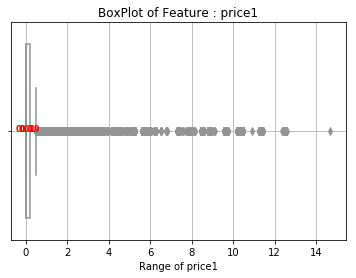

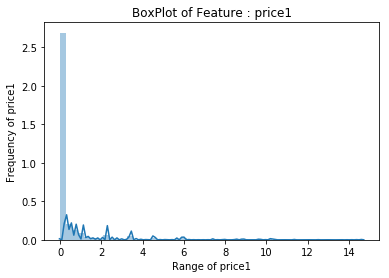

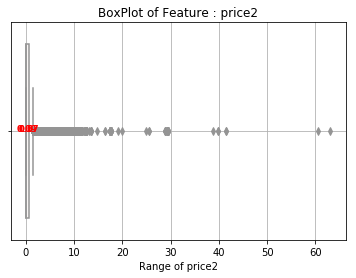

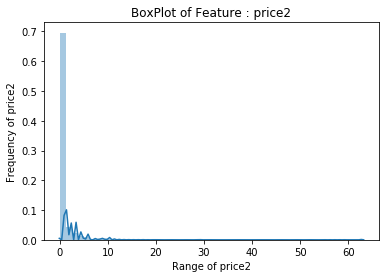

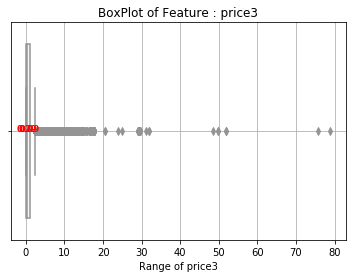

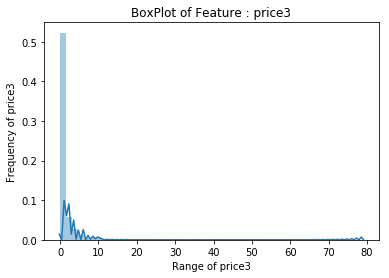

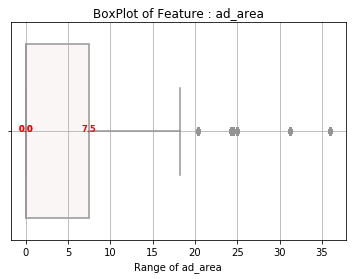

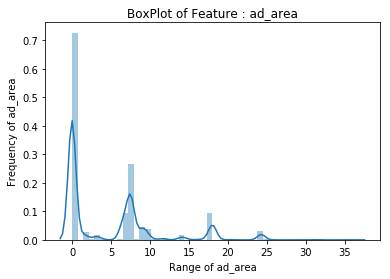

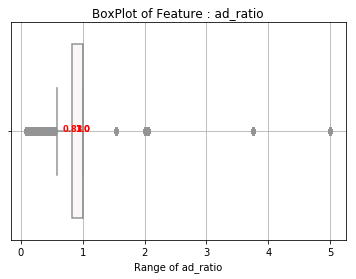

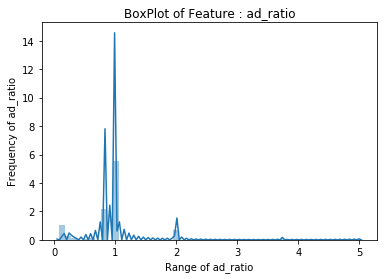

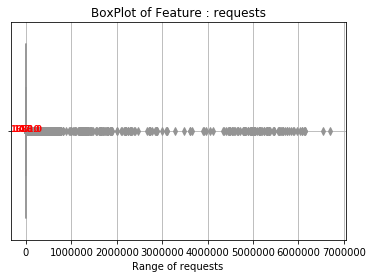

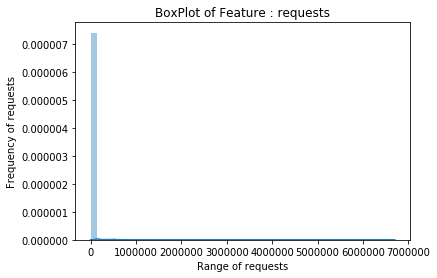

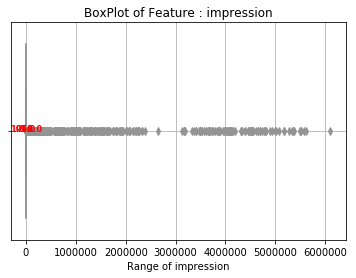

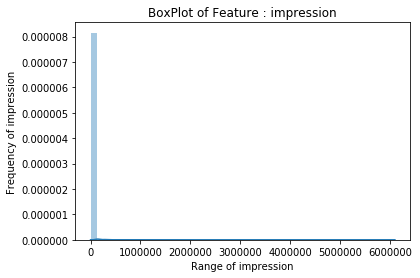

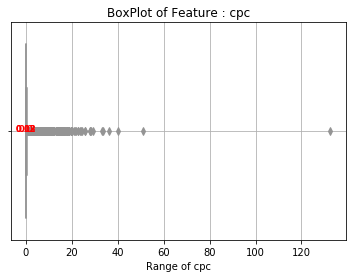

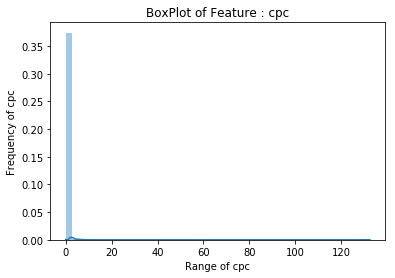

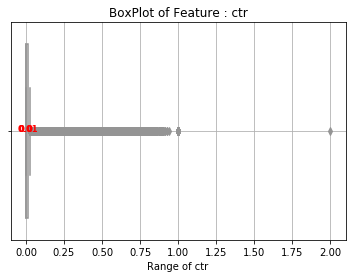

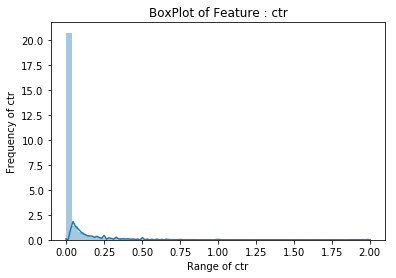

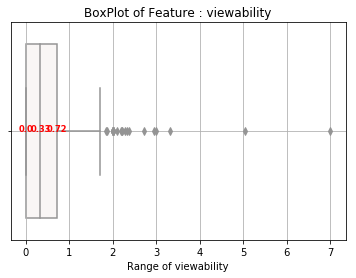

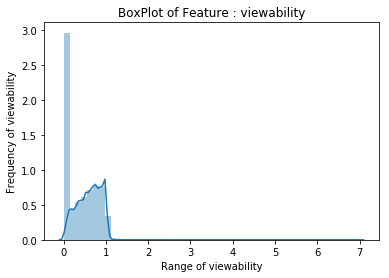

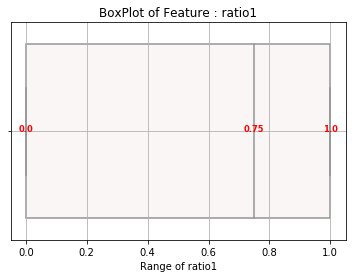

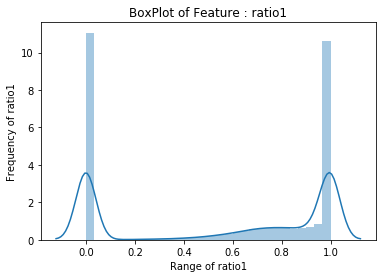

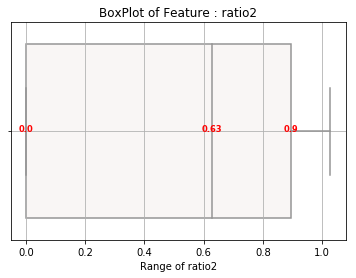

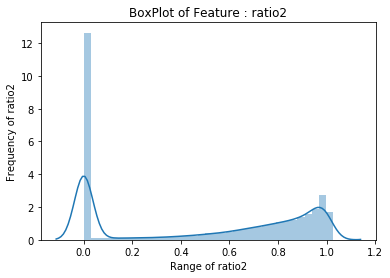

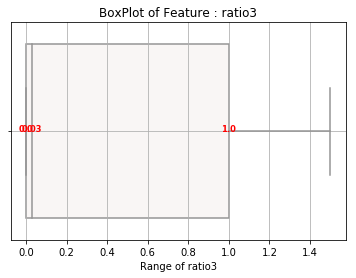

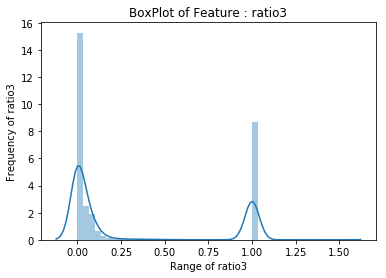

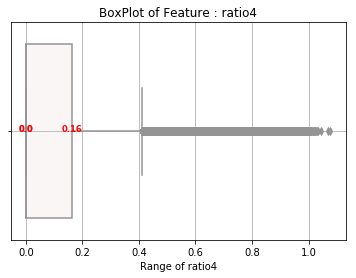

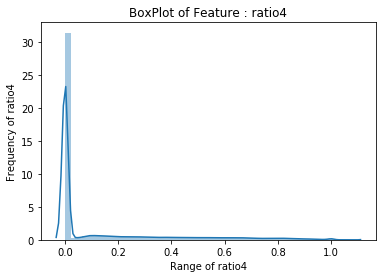

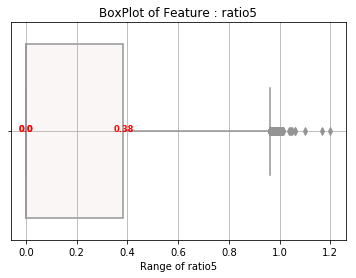

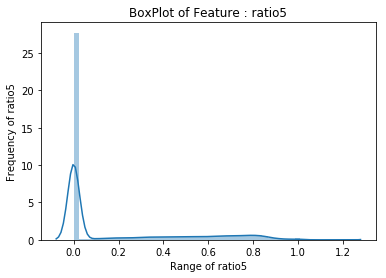

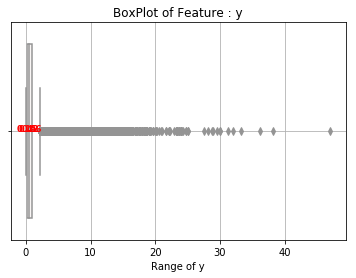

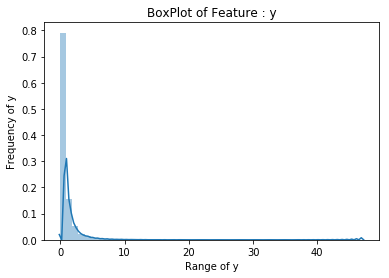

In [10]:
for float_cols in raw_train_data.select_dtypes('float').columns:
    if debug == True: print("we are starting")
    if debug == True: print(float_cols)
    create_boxplot(raw_train_data,float_cols)
    create_histplots(raw_train_data,float_cols)
    if debug == True: print("we are ending")

In [13]:
# Transform the data
trans_train_data = raw_train_data.copy()
for float_cols in trans_train_data.select_dtypes('float').columns:
    trans_train_data[float_cols] = 1/np.sqrt((raw_train_data[float_cols]+0.5)) 

price1


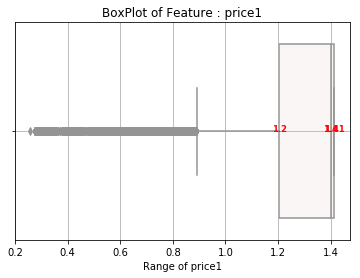

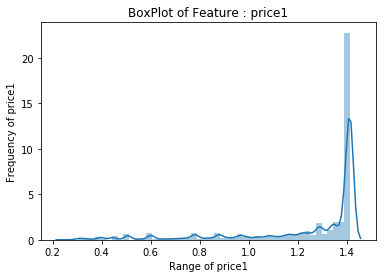

price2


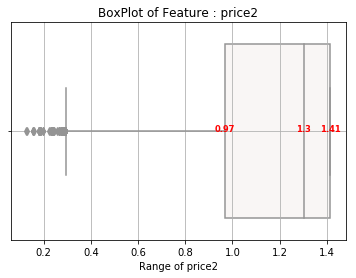

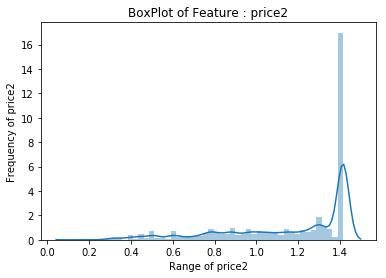

price3


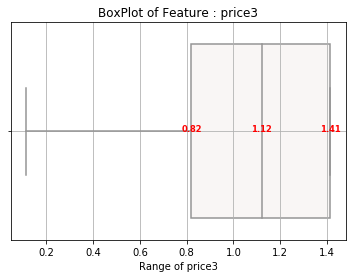

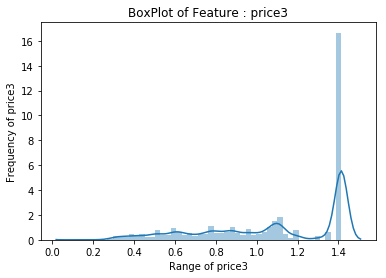

ad_area


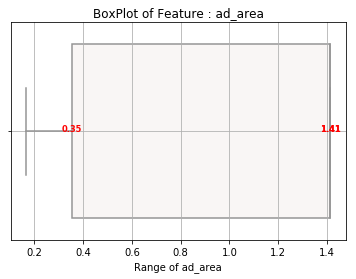

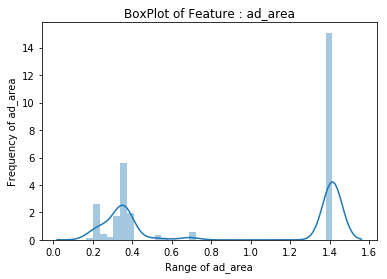

ad_ratio


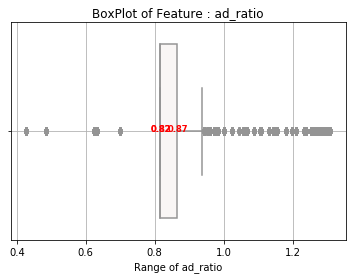

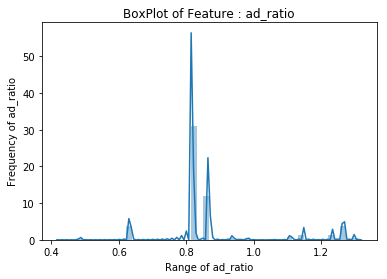

requests


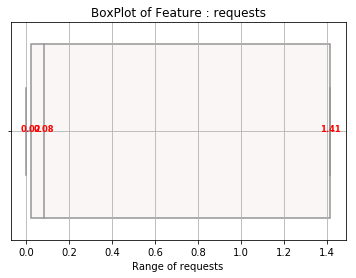

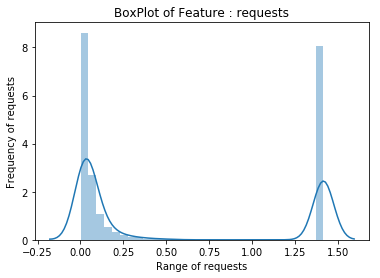

impression


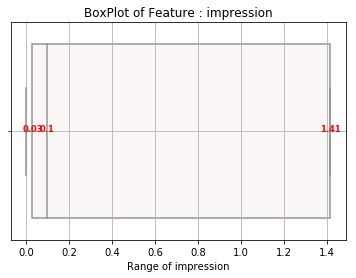

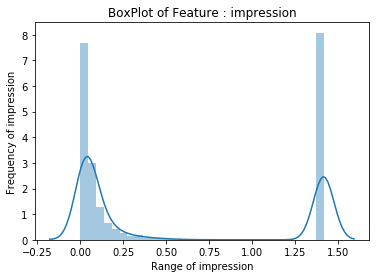

cpc


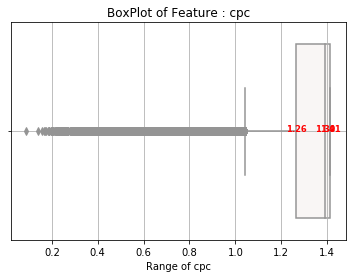

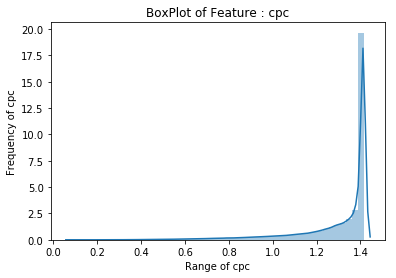

ctr


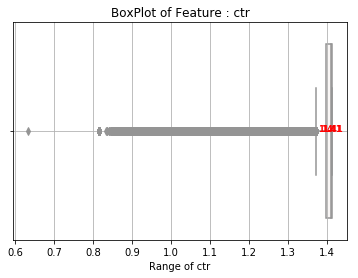

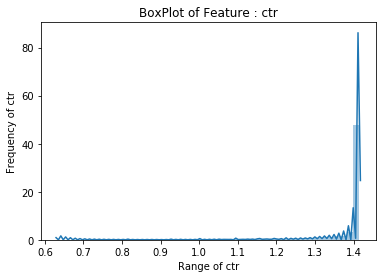

viewability


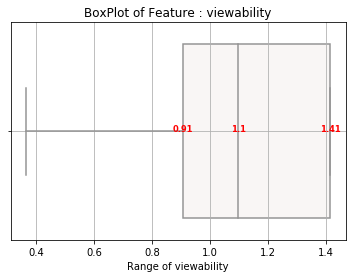

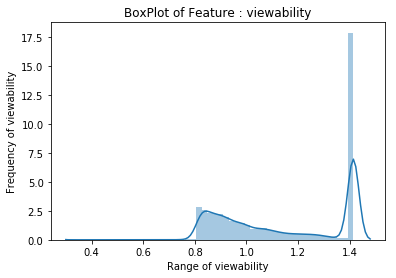

ratio1


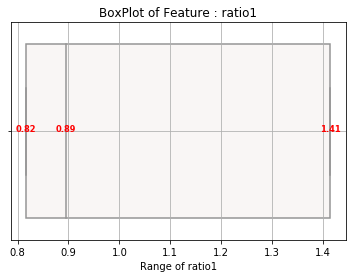

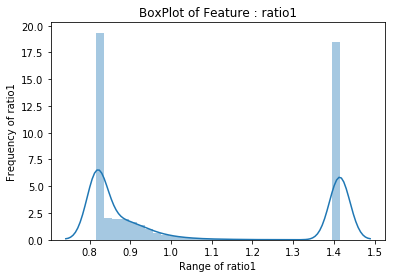

ratio2


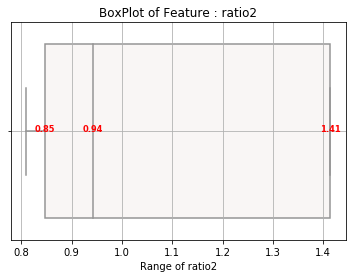

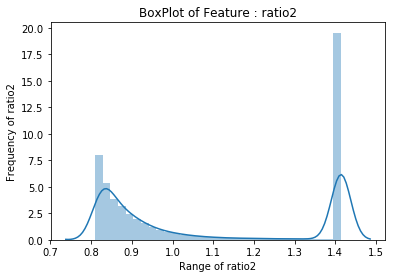

ratio3


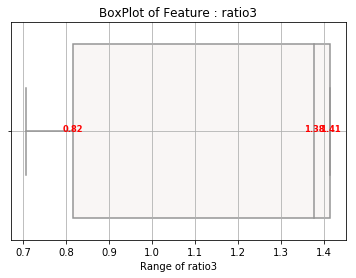

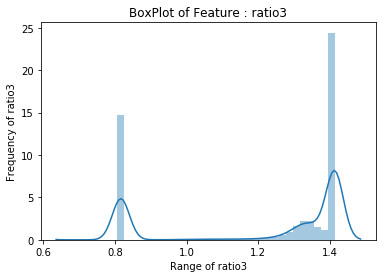

ratio4


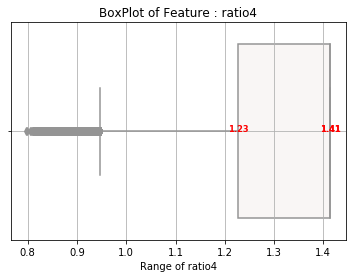

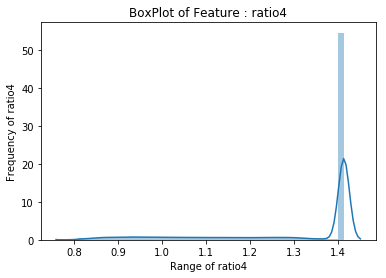

ratio5


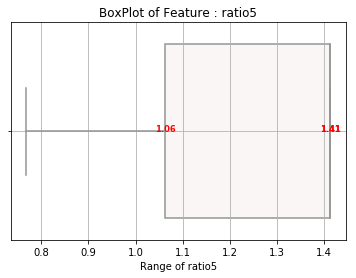

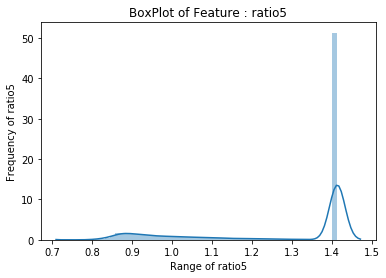

y


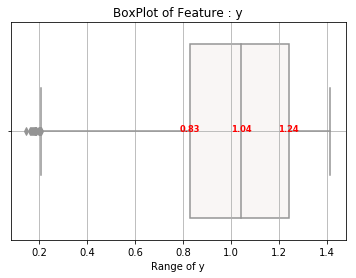

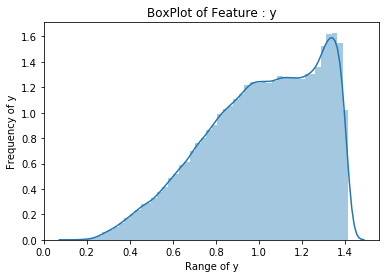

In [14]:
for float_cols in trans_train_data.select_dtypes('float').columns:
    if debug == True: print("we are starting")
    print(float_cols)
    create_boxplot(trans_train_data,float_cols)
    create_histplots(trans_train_data,float_cols)
    if debug == True: print("we are ending")

In [17]:
ax = sns.barplot(y="dow", data=trans_train_data);
ax.set_xticklabels(rotation=30)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

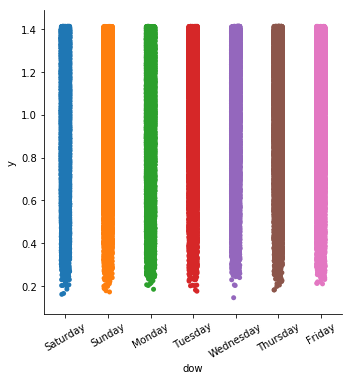

In [12]:
ax = sns.catplot(x="dow", y="y", data=trans_train_data);
ax.set_xticklabels(rotation=30)

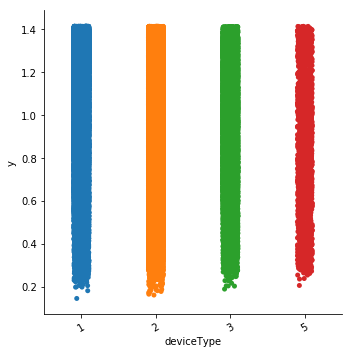

In [16]:
ax = sns.catplot(x="deviceType", y="y",data=trans_train_data);
ax.set_xticklabels(rotation=30)

#sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

KeyboardInterrupt: 

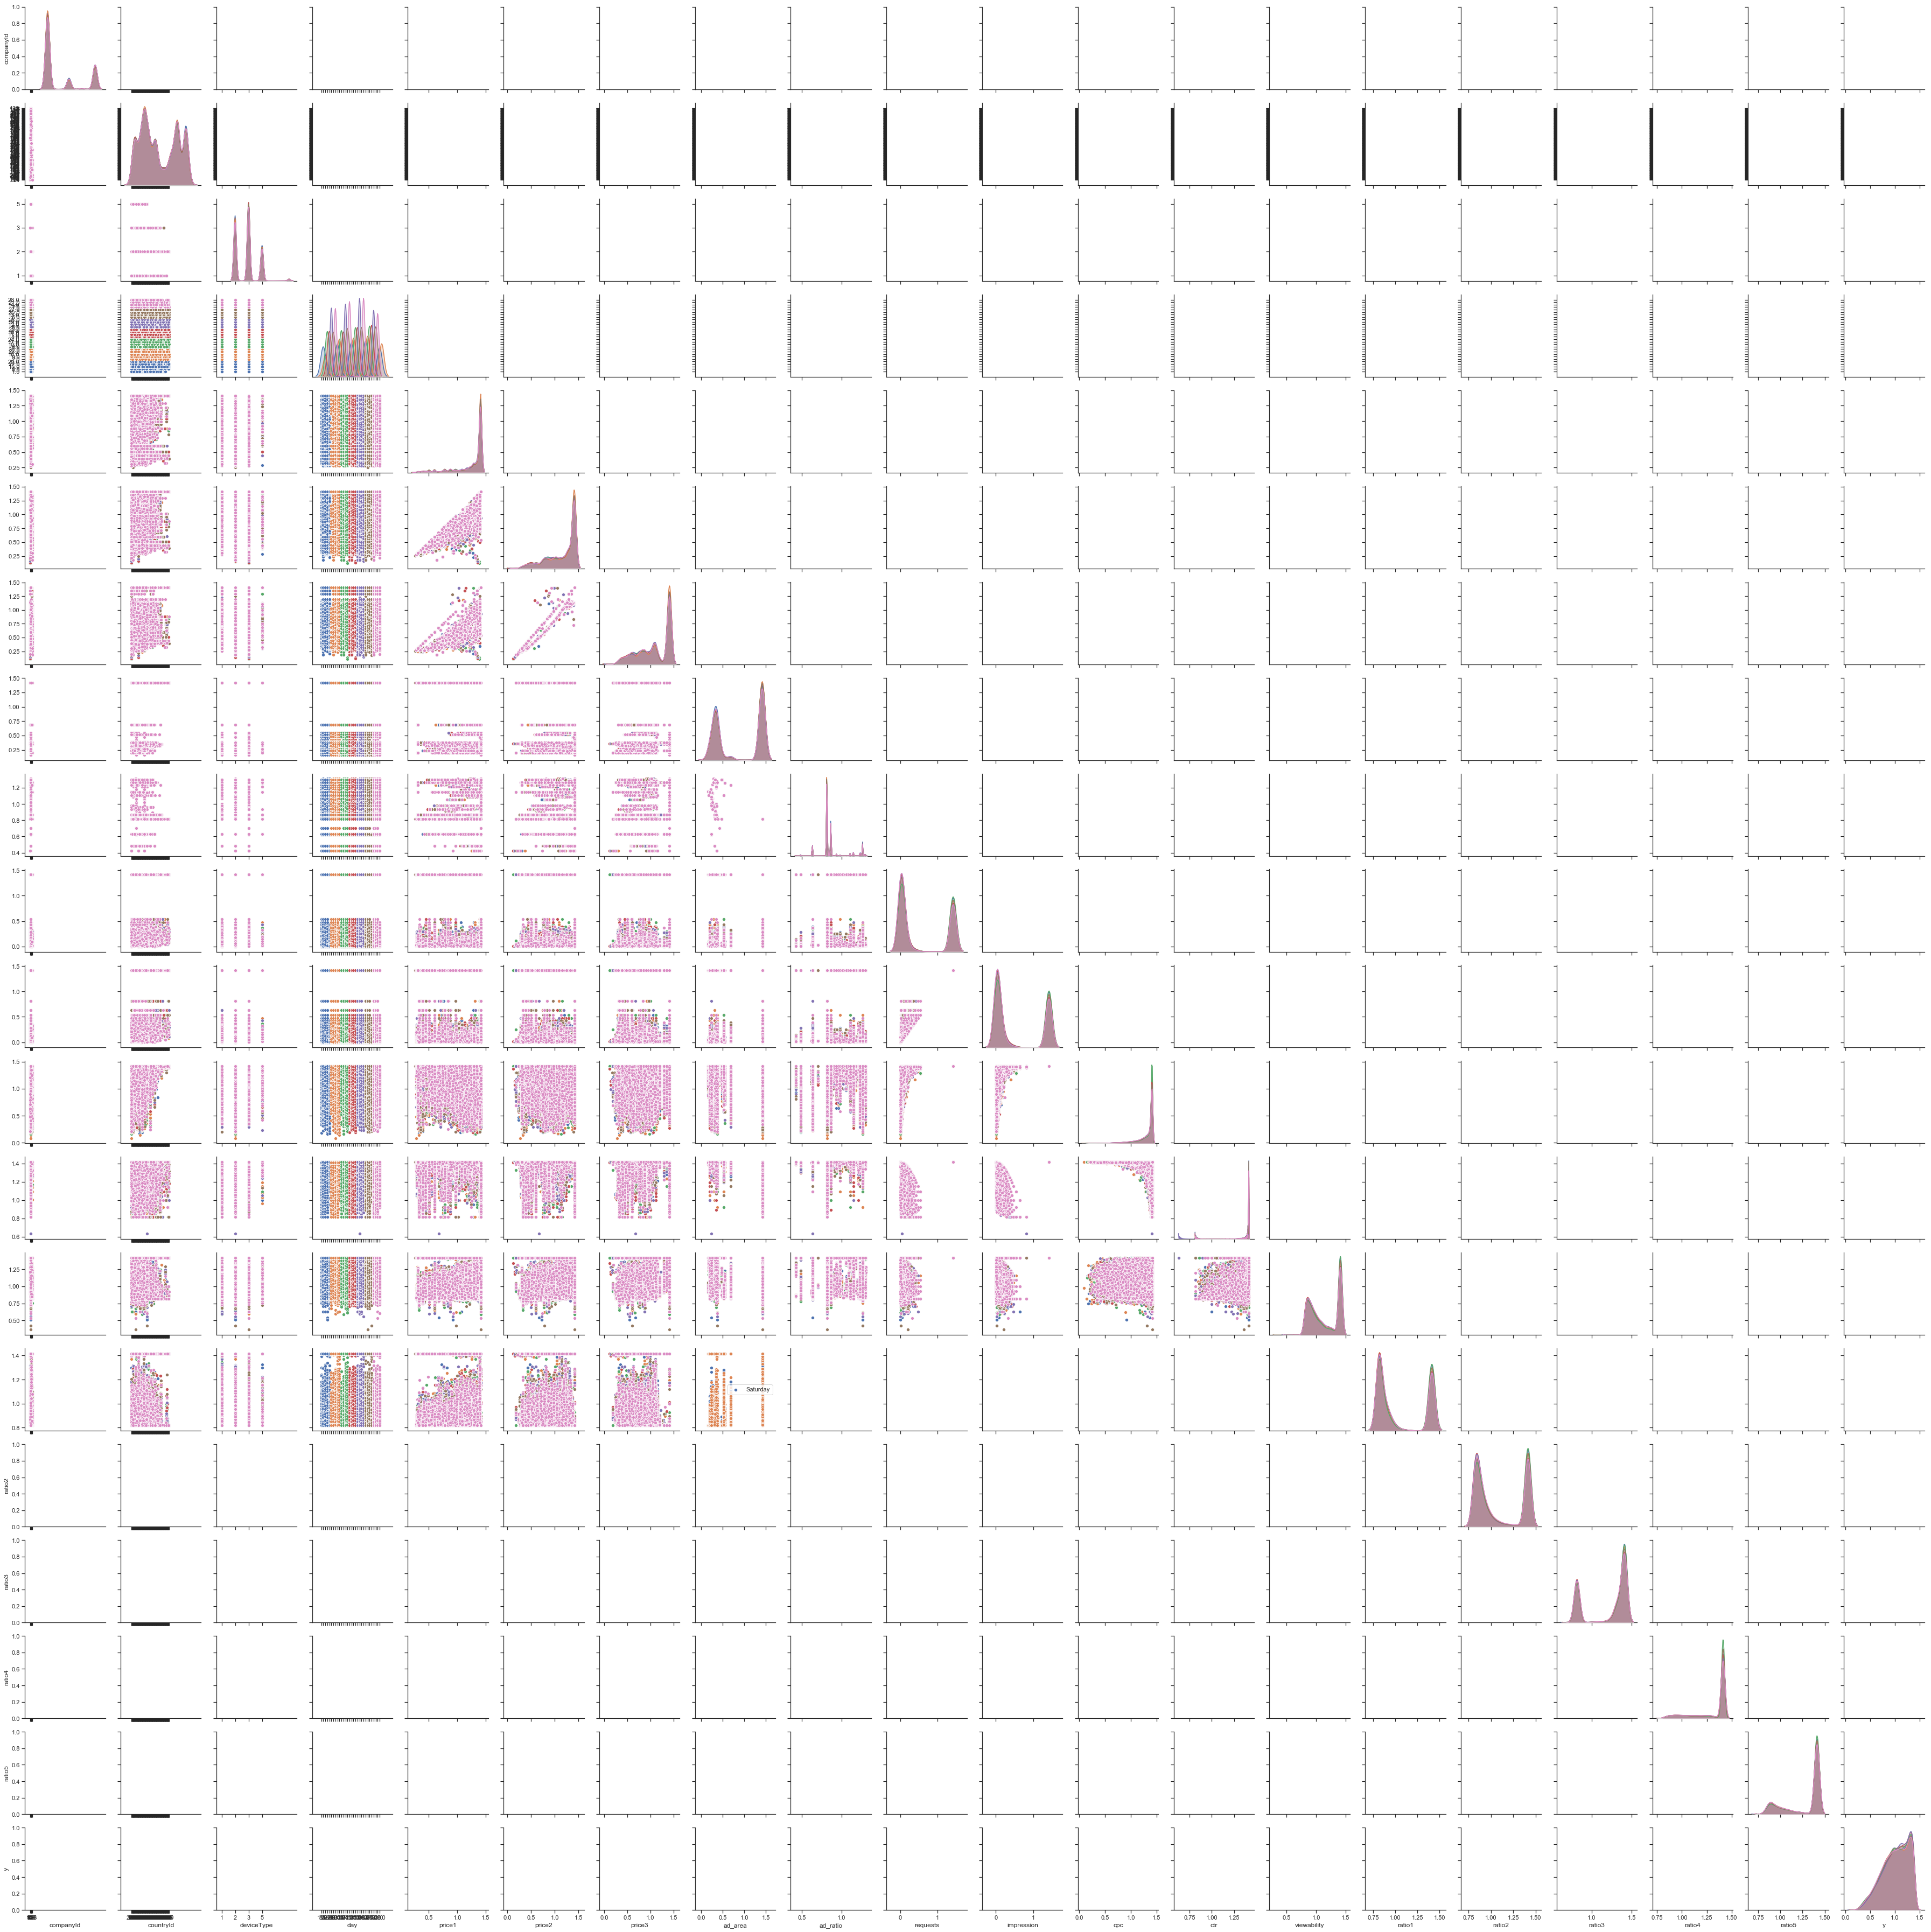

In [17]:
sns.set(style="ticks")
sns.pairplot(trans_train_data, hue="dow")

ValueError: color kwarg must have one color per data set. 214128 data sets and 1 colors were provided

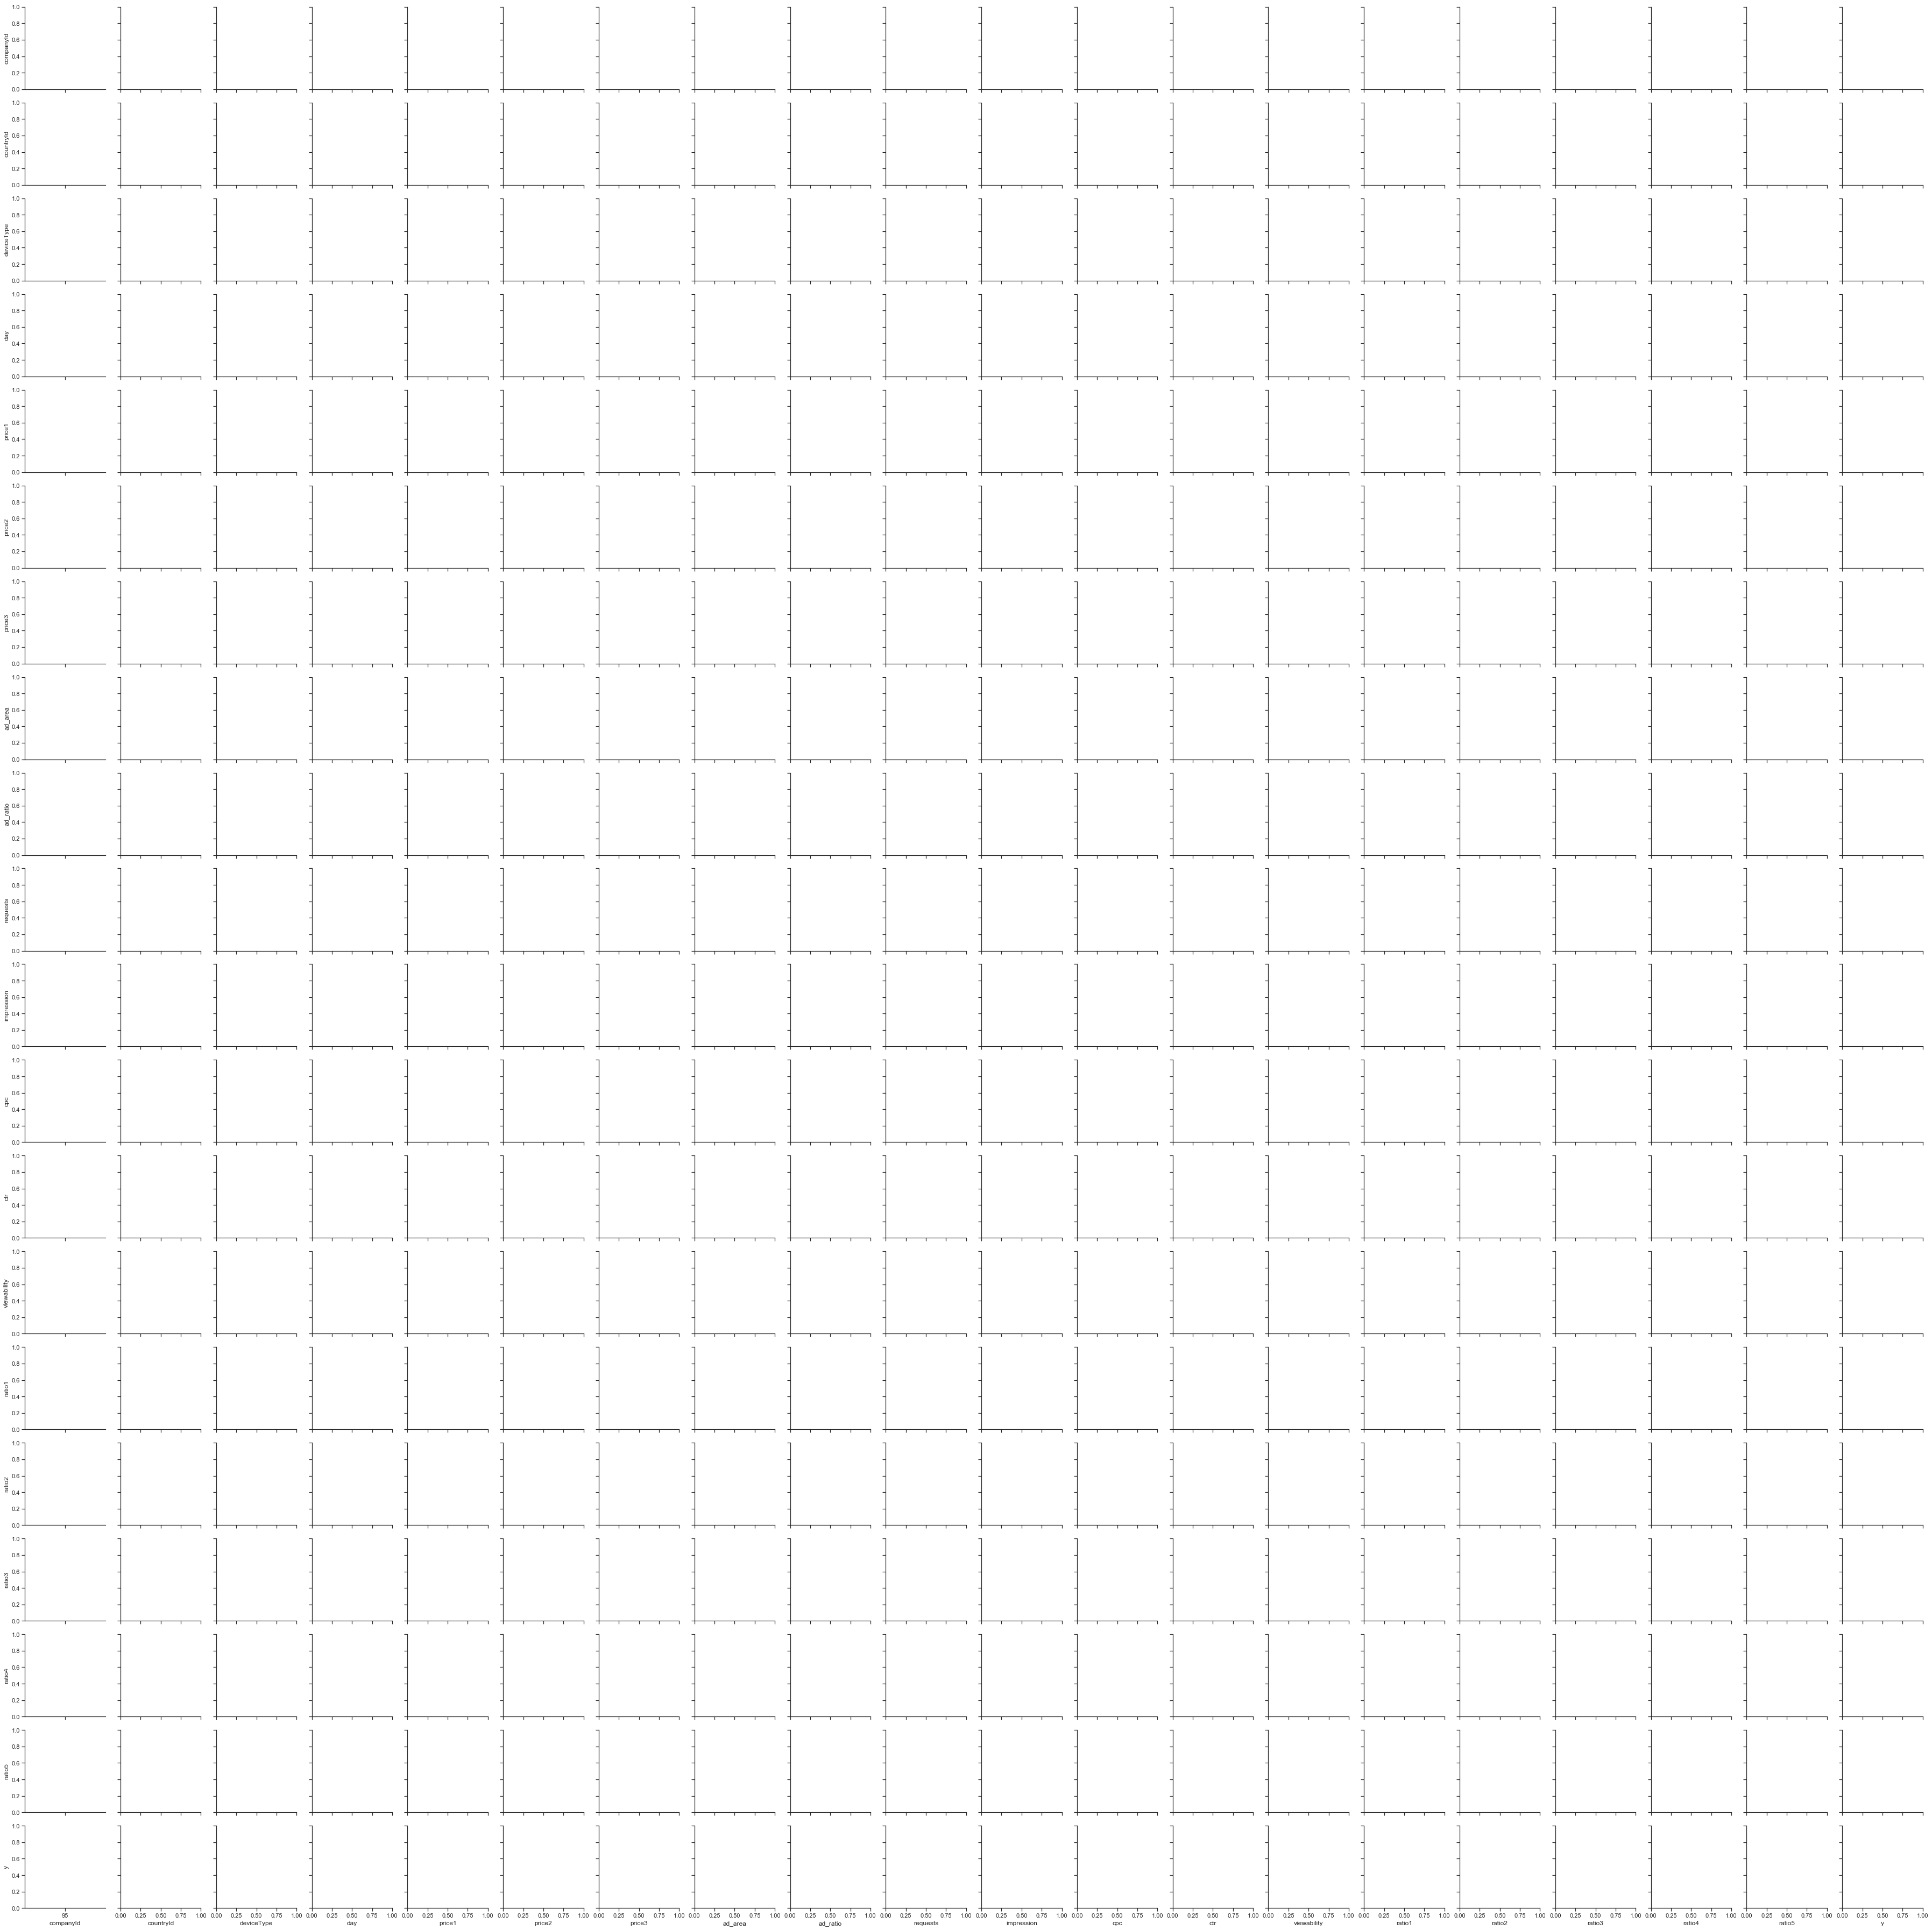

In [20]:
sns.set(style="ticks")
sns.pairplot(trans_train_data)

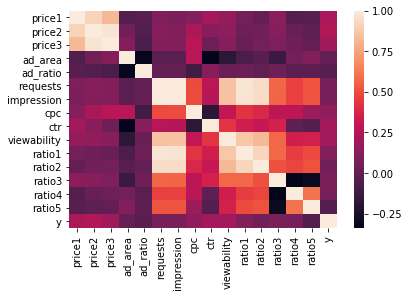

In [18]:
corr = trans_train_data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [19]:
corr

price1    price2    price3   ad_area  ad_ratio  requests  \
price1       1.000000  0.913981  0.824453 -0.056665 -0.031000  0.090016   
price2       0.913981  1.000000  0.969635  0.046692 -0.051326  0.111254   
price3       0.824453  0.969635  1.000000  0.107651 -0.077006  0.109431   
ad_area     -0.056665  0.046692  0.107651  1.000000 -0.322496 -0.024656   
ad_ratio    -0.031000 -0.051326 -0.077006 -0.322496  1.000000  0.010910   
requests     0.090016  0.111254  0.109431 -0.024656  0.010910  1.000000   
impression   0.076821  0.100728  0.101072 -0.018938  0.008999  0.999077   
cpc          0.115478  0.229116  0.272862  0.270166 -0.102505  0.495247   
ctr          0.208300  0.115664  0.037769 -0.332159  0.120202  0.271422   
viewability  0.160339  0.145207  0.110770 -0.182471  0.025317  0.857781   
ratio1       0.055221  0.038751  0.017043 -0.072577  0.031504  0.974875   
ratio2       0.013318  0.045964  0.057714 -0.026837  0.000037  0.944603   
ratio3       0.133510  0.111824  0.086509 -0.130707  0.035244  0.568879   
ratio4      -0.041585  0.017662  0.039573  0.053471 -0.017625  0.466510   
ratio5      -0.033635 -0.012623  0.005708  0.102141 -0.020404  0.519911   
y            0.224428  0.247833  0.193782  0.007731 -0.027359  0.065831   

             impression       cpc       ctr  viewability    ratio1    ratio2  \
price1         0.076821  0.115478  0.208300     0.160339  0.055221  0.013318   
price2         0.100728  0.229116  0.115664     0.145207  0.038751  0.045964   
price3         0.101072  0.272862  0.037769     0.110770  0.017043  0.057714   
ad_area       -0.018938  0.270166 -0.332159    -0.182471 -0.072577 -0.026837   
ad_ratio       0.008999 -0.102505  0.120202     0.025317  0.031504  0.000037   
requests       0.999077  0.495247  0.271422     0.857781  0.974875  0.944603   
impression     1.000000  0.500464  0.253203     0.853718  0.973562  0.943925   
cpc            0.500464  1.000000 -0.182600     0.297498  0.429452  0.390774   
ctr            0.253203 -0.182600  1.000000     0.434815  0.348042  0.304911   
viewability    0.853718  0.297498  0.434815     1.000000  0.870786  0.824738   
ratio1         0.973562  0.429452  0.348042     0.870786  1.000000  0.921824   
ratio2         0.943925  0.390774  0.304911     0.824738  0.921824  1.000000   
ratio3         0.563729  0.280306  0.366006     0.575938  0.571629  0.510563   
ratio4         0.470396  0.281837 -0.014140     0.350187  0.451162  0.480993   
ratio5         0.522933  0.183427 -0.042433     0.359666  0.495393  0.515172   
y              0.068617  0.142865  0.205984     0.199894  0.100416  0.051585   

               ratio3    ratio4    ratio5         y  
price1       0.133510 -0.041585 -0.033635  0.224428  
price2       0.111824  0.017662 -0.012623  0.247833  
price3       0.086509  0.039573  0.005708  0.193782  
ad_area     -0.130707  0.053471  0.102141  0.007731  
ad_ratio     0.035244 -0.017625 -0.020404 -0.027359  
requests     0.568879  0.466510  0.519911  0.065831  
impression   0.563729  0.470396  0.522933  0.068617  
cpc          0.280306  0.281837  0.183427  0.142865  
ctr          0.366006 -0.014140 -0.042433  0.205984  
viewability  0.575938  0.350187  0.359666  0.199894  
ratio1       0.571629  0.451162  0.495393  0.100416  
ratio2       0.510563  0.480993  0.515172  0.051585  
ratio3       1.000000 -0.339641 -0.306377  0.080482  
ratio4      -0.339641  1.000000  0.605448  0.066424  
ratio5      -0.306377  0.605448  1.000000 -0.056907  
y            0.080482  0.066424 -0.056907  1.000000

REferences
https://stackoverflow.com/questions/38649501/labeling-boxplot-in-seaborn-with-median-value


In [ ]:
1. add bar plots for all categorical feat - company, country, dow, day of month, devicetype
5. report writing


2. add scatter plats for y and 5 highest correlated feat
3. some graph for all interaction between categorical and target
4. what to do with day of month 
